In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy.random as np
import sys
import matplotlib
from mlxtend.preprocessing import OnehotTransactions
from mlxtend.frequent_patterns import apriori
%matplotlib inline

In [2]:
df = pd.read_csv('genes.csv')

In [3]:
df.head()

,id,cromosoma,gen,pos_inicio,pos_fin,ref,alt,referencia_cambioAA,homocigoto,paciente_id,funcion_gen_ref,tipo_variante,clinvar_sig
0,1,chr1,AGRN,979748,979748,A,T,AGRN:exon12:c.A2183T:p.E728V,0,1,exonic,nonsynonymous SNV,non-pathogenic
1,2,chr1,AGRN,981931,981931,A,G,AGRN:exon18:c.A3066G:p.S1022S,1,1,exonic,synonymous SNV,non-pathogenic
2,3,chr1,AGRN,982994,982994,T,C,AGRN:exon21:c.T3558C:p.F1186F,1,1,exonic,synonymous SNV,non-pathogenic
3,4,chr1,"CDK11A,CDK11B",1650845,1650845,G,A,CDK11A:exon4:c.C277T:p.R93W\nCDK11B:exon4:c.C2...,0,1,exonic,nonsynonymous SNV,NaN
4,5,chr1,GABRD,1957037,1957037,T,C,GABRD:exon4:c.T330C:p.G110G,0,1,exonic,synonymous SNV,NaN


In [5]:
#df.groupby('paciente_id').describe()
list(df)

['id',
 'cromosoma',
 'gen',
 'pos_inicio',
 'pos_fin',
 'ref',
 'alt',
 'referencia_cambioAA',
 'homocigoto',
 'paciente_id',
 'funcion_gen_ref',
 'tipo_variante',
 'clinvar_sig']

In [6]:
x = df['gen'].drop_duplicates().values.tolist()

In [6]:
len(x)

4465

In [7]:
df['homocigoto'] = df.homocigoto.replace(0,'no')
df['homocigoto'] = df.homocigoto.replace(1,'yes')

In [8]:
df

,id,cromosoma,gen,pos_inicio,pos_fin,ref,alt,referencia_cambioAA,homocigoto,paciente_id,funcion_gen_ref,tipo_variante,clinvar_sig
0,1,chr1,AGRN,979748,979748,A,T,AGRN:exon12:c.A2183T:p.E728V,no,1,exonic,nonsynonymous SNV,non-pathogenic
1,2,chr1,AGRN,981931,981931,A,G,AGRN:exon18:c.A3066G:p.S1022S,yes,1,exonic,synonymous SNV,non-pathogenic
2,3,chr1,AGRN,982994,982994,T,C,AGRN:exon21:c.T3558C:p.F1186F,yes,1,exonic,synonymous SNV,non-pathogenic
3,4,chr1,"CDK11A,CDK11B",1650845,1650845,G,A,CDK11A:exon4:c.C277T:p.R93W\nCDK11B:exon4:c.C2...,no,1,exonic,nonsynonymous SNV,NaN
4,5,chr1,GABRD,1957037,1957037,T,C,GABRD:exon4:c.T330C:p.G110G,no,1,exonic,synonymous SNV,NaN
5,6,chr1,PEX10,2340200,2340200,T,C,PEX10:exon3:c.A291G:p.T97T,yes,1,exonic,synonymous SNV,probable-non-pathogenic
6,7,chr1,MMEL1,2560882,2560882,G,A,MMEL1:exon2:c.C42T:p.A14A,yes,1,exonic,synonymous SNV,NaN
7,8,chr1,TP73,3638674,3638674,C,T,TP73:exon3:c.C306T:p.T102T\nTP73:exon3:c.C372T...,yes,1,exonic,synonymous SNV,NaN
8,9,chr1,KCNAB2,6158562,6158562,A,G,KCNAB2:exon14:c.A831G:p.S277S\nKCNAB2:exon15:c...,yes,1,exonic,synonymous SNV,NaN
9,10,chr1,PLEKHG5,6528589,6528589,C,T,PLEKHG5:exon20:c.G2307A:p.T769T\nPLEKHG5:exon2...,no,1,exonic,synonymous SNV,NaN


In [4]:
df1 = df[['paciente_id','gen', 'homocigoto', 'tipo_variante']]
df1.head()

,paciente_id,gen,homocigoto,tipo_variante
0,1,AGRN,0,nonsynonymous SNV
1,1,AGRN,1,synonymous SNV
2,1,AGRN,1,synonymous SNV
3,1,"CDK11A,CDK11B",0,nonsynonymous SNV
4,1,GABRD,0,synonymous SNV


In [5]:
df1.to_csv('gen.csv',index=False)

In [15]:
f = pd.read_csv('weka.csv') #Creada en RRRRRRRR

In [16]:
f.head()

,paciente_id,gen,homocigoto,tipo_variante,cluster,edad,sexo,edad1
0,1,AGRN,False,nonsynonymous SNV,2,2,M,"(0, 10]"
1,1,AGRN,True,synonymous SNV,2,2,M,"(0, 10]"
2,1,AGRN,True,synonymous SNV,2,2,M,"(0, 10]"
3,1,"CDK11A,CDK11B",False,nonsynonymous SNV,2,2,M,"(0, 10]"
4,1,GABRD,False,synonymous SNV,2,2,M,"(0, 10]"


In [14]:
f['cluster'] = f.cluster.replace(0,'c1')
f['cluster'] = f.cluster.replace(1,'c2')
f['cluster'] = f.cluster.replace(2,'c3')
f['cluster'] = f.cluster.replace(3,'c4')
f['cluster'] = f.cluster.replace(4,'c5')
f.head()

,gen,homocigoto,tipo_variante,cluster,edad,sexo
0,AGRN,False,nonsynonymous SNV,c3,2,0
1,AGRN,True,synonymous SNV,c3,2,0
2,AGRN,True,synonymous SNV,c3,2,0
3,"CDK11A,CDK11B",False,nonsynonymous SNV,c3,2,0
4,GABRD,False,synonymous SNV,c3,2,0


In [17]:
del f['paciente_id']

In [48]:
del f['cluster']

In [62]:
del f['edad']

In [52]:
del f['sexo']

In [21]:
del f['edad1']

In [22]:
f.head()

,gen,homocigoto,tipo_variante,cluster,edad,sexo
0,AGRN,False,nonsynonymous SNV,2,2,0
1,AGRN,True,synonymous SNV,2,2,0
2,AGRN,True,synonymous SNV,2,2,0
3,"CDK11A,CDK11B",False,nonsynonymous SNV,2,2,0
4,GABRD,False,synonymous SNV,2,2,0


In [23]:
f.to_csv('prueba1.csv', index = False)

In [19]:
f['sexo'] = f.sexo.replace('M',0)
f['sexo'] = f.sexo.replace('F',1)

In [9]:
r = f.applymap(str)
#f.to_csv("tablapreasociacion.csv",index =False)

In [64]:
solo1 = f[f['gen'].str.contains('BRCA1|BRCA2')]

In [65]:
solo1

,gen,homocigoto,tipo_variante,cluster,sexo,edad1
2667,BRCA2,False,nonsynonymous SNV,c3,M,"(0, 10]"
2668,BRCA2,False,synonymous SNV,c3,M,"(0, 10]"
2669,BRCA2,False,nonsynonymous SNV,c3,M,"(0, 10]"
2670,BRCA2,False,synonymous SNV,c3,M,"(0, 10]"
2671,BRCA2,False,synonymous SNV,c3,M,"(0, 10]"
2672,BRCA2,False,nonsynonymous SNV,c3,M,"(0, 10]"
6719,BRCA2,False,nonsynonymous SNV,c3,F,"(0, 10]"
6720,BRCA2,False,synonymous SNV,c3,F,"(0, 10]"
6721,BRCA2,False,synonymous SNV,c3,F,"(0, 10]"
6722,BRCA2,False,nonsynonymous SNV,c3,F,"(0, 10]"


In [69]:
del solo1['edad']

In [70]:
solo1['sexo'] = solo1.sexo.replace('F',1)

/home/jennifer/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [71]:
solo1['sexo'] = solo1.sexo.replace('M',0)

/home/jennifer/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [75]:
solo1.head()

,gen,homocigoto,tipo_variante,sexo,edad1
7348,BRCA1,False,nonsynonymous SNV,1,"(0, 10]"
7349,BRCA1,False,synonymous SNV,1,"(0, 10]"
7350,BRCA1,False,nonsynonymous SNV,1,"(0, 10]"
7351,BRCA1,False,nonsynonymous SNV,1,"(0, 10]"
7352,BRCA1,False,nonsynonymous SNV,1,"(0, 10]"


In [76]:
#del solo1['cluster']
#del solo1['edad']
del solo1['sexo']

In [66]:
solo1.to_csv('arbolito1.csv', index = False)

In [16]:
#del f['edad1']
del r['paciente_id']

In [17]:
del r['edad']

In [13]:
r.dtypes

gen              object
homocigoto       object
tipo_variante    object
cluster          object
edad             object
sexo             object
edad1            object
dtype: object

In [14]:
r.head()

,gen,homocigoto,tipo_variante,cluster,edad,sexo,edad1
0,AGRN,False,nonsynonymous SNV,2,2,M,"(0, 10]"
1,AGRN,True,synonymous SNV,2,2,M,"(0, 10]"
2,AGRN,True,synonymous SNV,2,2,M,"(0, 10]"
3,"CDK11A,CDK11B",False,nonsynonymous SNV,2,2,M,"(0, 10]"
4,GABRD,False,synonymous SNV,2,2,M,"(0, 10]"


In [15]:
r['gen'] = r.gen.str.replace(',','')
r['gen'] = r.gen.str.replace(';','')
r['gen'] = r.gen.str.replace('-','')

In [17]:
r.head()

,gen,homocigoto,tipo_variante,cluster,edad,sexo,edad1
0,AGRN,False,nonsynonymous SNV,2,2,M,"(0, 10]"
1,AGRN,True,synonymous SNV,2,2,M,"(0, 10]"
2,AGRN,True,synonymous SNV,2,2,M,"(0, 10]"
3,CDK11ACDK11B,False,nonsynonymous SNV,2,2,M,"(0, 10]"
4,GABRD,False,synonymous SNV,2,2,M,"(0, 10]"


In [16]:
oht = OnehotTransactions()
oht_ary = oht.fit(r).transform(r)
df4 = pd.DataFrame(oht_ary, columns=oht.columns_)
frequent_itemsets = apriori(df4, min_support=0.6, use_colnames=True)

In [18]:
df4.head()

,1,_,a,c,d,e,g,h,i,l,m,n,o,p,r,s,t,u,v,x
0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,1,1,1,0,1,0,1,0,0,0,1,0,0,0
2,0,1,1,0,0,1,0,0,1,0,0,1,1,1,1,0,1,0,1,0
3,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1,1,1,0,0
4,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
ceros = pd.get_dummies(r)

In [18]:
len(ceros)

803878

In [20]:
ceros.to_csv('tabla_binaria1.csv', index = False)

In [ ]:
b1 =ceros.replace(0,'no')

In [ ]:
b2 = b1.replace(1,'yes')

19943

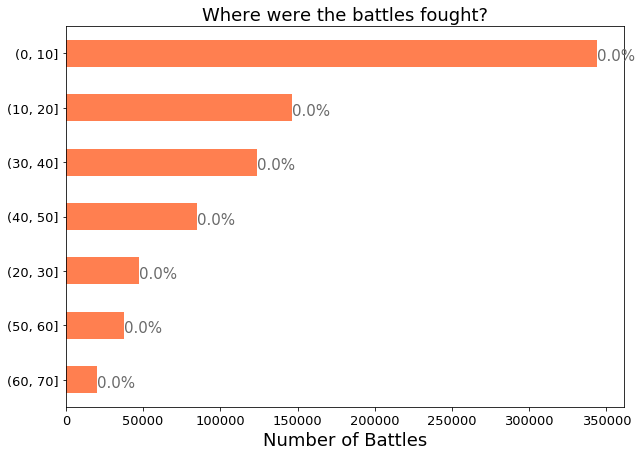

In [248]:
ax = r['edad1'].value_counts().plot(kind='barh', figsize=(10,7),
                                        color="coral", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Where were the battles fought?", fontsize=18)
ax.set_xlabel("Number of Battles", fontsize=18);
#ax.set_xticks([0, 5, 10, 15, 20,25,30,40,45])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='dimgrey')
# invert for largest on top 
ax.invert_yaxis()
i.get_width()

In [231]:
c = r[['edad1','cluster','sexo','cluster']]
c.applymap(str)
c.to_csv("output.csv", index = False)

In [215]:
c.dtypes

edad1      object
cluster    object
sexo       object
cluster    object
dtype: object

In [233]:
c = r[['edad1','cluster','sexo','gen','homocigoto','tipo_variante']]
c.to_csv("output.csv", index = False)

In [177]:
d.head()

,edad1,cluster,sexo,gen,homocigoto,tipo_variante
0,"(0, 10]",c3,M,AGRN,False,nonsynonymous SNV
1,"(0, 10]",c3,M,AGRN,True,synonymous SNV
2,"(0, 10]",c3,M,AGRN,True,synonymous SNV
3,"(0, 10]",c3,M,CDK11A CDK11B,False,nonsynonymous SNV
4,"(0, 10]",c3,M,GABRD,False,synonymous SNV


In [142]:
z = r[['tipo_variante']]
z.head()

,tipo_variante
0,nonsynonymous SNV
1,synonymous SNV
2,synonymous SNV
3,nonsynonymous SNV
4,synonymous SNV


In [143]:
z1 = r[['cluster']]
z1.head()

,cluster
0,c3
1,c3
2,c3
3,c3
4,c3


In [156]:
variantes = pd.get_dummies(z)
variantes = variantes.replace(0,'no')
variantes = variantes.replace(1,'yes')

In [148]:
#cluster = pd.get_dummies(z1)
cluster.head()

,cluster_c1,cluster_c2,cluster_c3,cluster_c4,cluster_c5
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0


In [153]:
o = cluster.replace(0,'no')
o = o.replace(1,'yes')
o.head()

,cluster_c1,cluster_c2,cluster_c3,cluster_c4,cluster_c5
0,no,no,yes,no,no
1,no,no,yes,no,no
2,no,no,yes,no,no
3,no,no,yes,no,no
4,no,no,yes,no,no


In [208]:
p = pd.concat([variantes, o], axis=1, join_axes=[df1.index])

In [ ]:
p

In [211]:
p.to_csv("prueba.csv", index =False)

In [121]:
x = z.pivot_table(index=df.index, columns='tipo_variante', aggfunc='first')

In [ ]:
x.head()

In [127]:
res

,T_A,T_B,T_C,T_D,T_E
0,1,0,0,0,0
1,0,1,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,0,1
